## Video 1: Intro to Hierarchical clustering

#### - Clusters are contained in one another, just like groups in real world

### Agglomertative Hierarchical Clustering
##### - Every item in a seperate cluster at first. Each step, two closest clusters are merged.
##### - Continue until all clusters are merged.

In [ ]:

# Exercise 1: Hierarchical clustering of the grain data
# In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. 
# Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. 
# A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

# Exercise 2: Hierarchies of stocks
#In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. 
#Now, you'll perform hierarchical clustering of the companies. 
#You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. 
#SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing 
#instead of Normalizer.

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

## Video 2: Cluster labels in hierarchical clustering
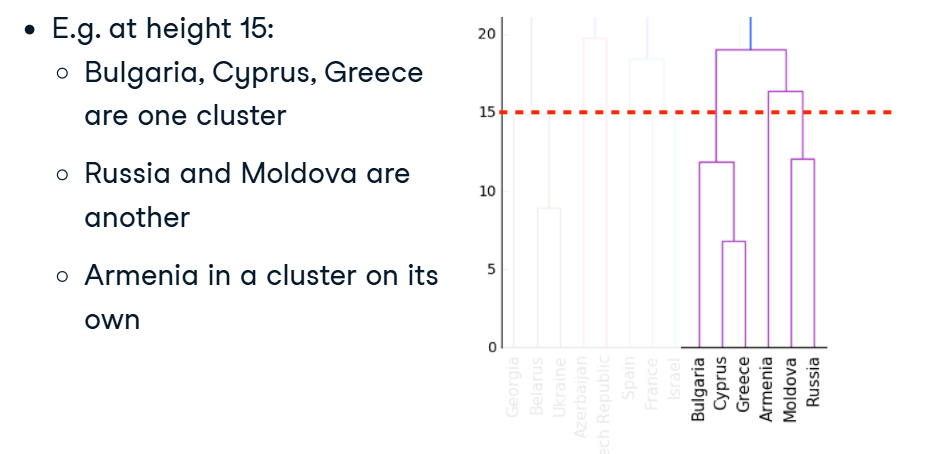

In [ ]:
# Example code from video:

# Extract cluster labels using fcluster
from scipy.cluster.hierarchy import linkage
mergings=linkage(samples, method='complete')
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion='distance')
print(labels)

# Aligning cluster labels with country names
pairs = pd.DataFrame({'labels':labels, 'countries': country_names})
print(pairs.sort_values('labels'))

# Example 1: Different linkage, different hierarchical clustering!
#In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. 
# Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. 
# Different linkage, different hierarchical clustering!

# You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for.
# The list country_names gives the name of each voting country.

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels = country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()

#Example 2: Extracting the cluster labels
# In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. 
# Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, 
# and compare the labels with the grain varieties using a cross-tabulation.

# The hierarchical clustering has already been performed and mergings is the result of the linkage() function. 
# The list varieties gives the variety of each grain sample.

# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])
# Display ct
print(ct)

## Video 3: t-SNE(t-distributed stochastic neighbor embedding) for 2 dimentional steps

##### - For inspecting dataset. Only has fit_transform(), does not have fit() and transform(), so can't extend the map to include new data samples.
##### - Learning rate: Need to try different learning rates for different datasets. It is clear when you've made a bad choice, 
##### - because all the samples appear bunched together in the scatter plot. Normally it's enough to try a few values between 50 and 200.
##### - The axes of a t-SNE plot do not have any interpretable meaning. They are different every time t-SNE is applied, even on the same data. 
###### - For example, here are three t-SNE plots of the scaled Piedmont wine samples, generated using the same code. 
##### - Note that the orientation of the plot is different each time, the three wine varieties(colors), have the same position relative to one another.

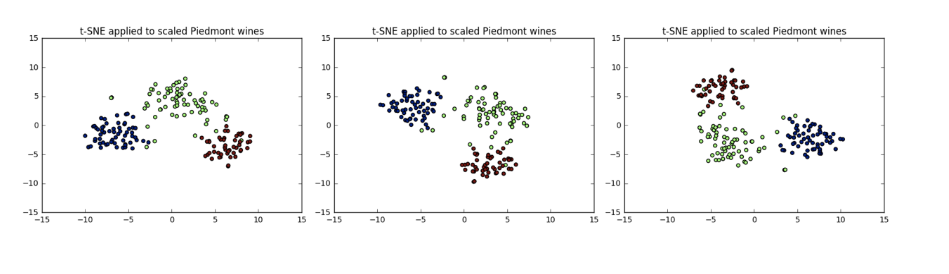


In [ ]:
# Code from video:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=species)
plt.show()

# Exercise 1: t-SNE visualization of grain dataset
# You saw t-SNE applied to the iris dataset. You'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. 
# You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

# Exercise 2: A t-SNE map of the stock market
# t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. 
# A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! 
# The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). 
# The list companies gives the name of each company. PyPlot (plt) has been imported for you.

from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
